In [1]:
import pandas as pd
import nltk
import numpy as np
from nltk.tokenize import word_tokenize
import re
import matplotlib.pyplot as plt
import math
from nltk.corpus import stopwords


In [2]:
Data = pd.read_csv("JobDataTranslated.csv")

In [3]:
Data.head()

,Unnamed: 0,Unnamed: 0.1,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,0,Sales Consultant Brunel Engineering,-1,You know better than anyone how to bind other ...,3.8,Brunel\n3.8,Groningen,-1,10000+ Employees,1975,Company - Public,Utilities,"Oil, Gas, Energy & Utilities",$1 to $2 billion (USD),-1
1,1,1,Bicycle courier,-1,Do you want to get paid to drive around your c...,4.1,Thuisbezorgd.nl\n4.1,Den Bosch,-1,1001 to 5000 Employees,2000,Company - Private,Internet,Information Technology,$100 to $500 million (USD),-1
2,2,2,Document Controller,-1,Document Controller Do you ensure that all dig...,3.3,Applus+ RTD\n3.3,Rotterdam,-1,10000+ Employees,1996,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
3,3,3,Customer service representative,-1,Our growing retail sector is looking for a ski...,-1.0,SiComputers,Nieuwerkerk aan den IJssel,-1,-1,-1,-1,-1,-1,-1,-1
4,4,4,Working from home - Call center Employee Ziggo,-1,"Working from home at Conduent, start your appl...",2.9,Conduent\n2.9,Capelle aan den IJssel,-1,10000+ Employees,2017,Company - Public,IT Services,Information Technology,Unknown / Non-Applicable,-1


In [4]:
Data["Job Description"][0]

"You know better than anyone how to bind other people to you, people for whom you can mean something. A great new assignment for jobseekers and the right match for their sourcing issue for clients. If you are also curious about market developments, would you like to hear more about projects within the industry and are you able to translate this information into opportunities for Brunel, then a role as a Sales Consultant is perfect for you! About this position As a Sales Consultant you always have something to do. Your main goal is to make the best match between clients and candidates, and that involves a lot. Your work does not stop at finding and connecting both parties. You are also responsible for expanding and maintaining your own network of candidates and clients. That means that you are in constant contact with both parties. Keeping an overview and keeping different balls in the air is no problem for you. Your focus area will be on specialists and organizations within the Norther

In [5]:
type(Data["Job Description"][3])

str

In [6]:
# function to preprocess speech
#Data['Job Description'].apply(lambda x: x.lower())

def clean(text):
    
    # removing paragraph numbers
    text = re.sub('[0-9]+.\t','',str(text))
    # removing new line characters
    text = re.sub('\n ','',str(text))
    text = re.sub('\n',' ',str(text))
    # removing apostrophes
    text = re.sub("'s",'',str(text))
    # removing hyphens
    text = re.sub("-",' ',str(text))
    text = re.sub("— ",'',str(text))
    # removing quotation marks
    text = re.sub('\"','',str(text))
    # removing salutations
    text = re.sub("Mr\.",'Mr',str(text))
    text = re.sub("Mrs\.",'Mrs',str(text))
    # removing any reference to outside text
    text = re.sub("[\(\[].*?[\)\]]", "", str(text))
    
    return text

# preprocessing speeches
Data['Cleaned Job Description'] = Data['Job Description'].apply(clean)

from string import punctuation

def remove_punctuation(s):
    global punctuation
    for p in punctuation:
        s = s.replace(p, '')
    return s

Data['Cleaned Job Description'] = Data['Cleaned Job Description'].map(remove_punctuation)

Data['Cleaned Job Description'] = Data['Cleaned Job Description'].apply(lambda x: x.lower())


In [7]:
Data['Cleaned Job Description'][0]

'you know better than anyone how to bind other people to you people for whom you can mean something a great new assignment for jobseekers and the right match for their sourcing issue for clients if you are also curious about market developments would you like to hear more about projects within the industry and are you able to translate this information into opportunities for brunel then a role as a sales consultant is perfect for you about this position as a sales consultant you always have something to do your main goal is to make the best match between clients and candidates and that involves a lot your work does not stop at finding and connecting both parties you are also responsible for expanding and maintaining your own network of candidates and clients that means that you are in constant contact with both parties keeping an overview and keeping different balls in the air is no problem for you your focus area will be on specialists and organizations within the northern netherlands

In [8]:
#Data['Job Description'].apply(lambda x: x.lower())

corpus = " ".join(Data['Cleaned Job Description'].tolist())
tokens = word_tokenize(corpus)
# Get the parts of speech tag for all words
answer = nltk.pos_tag(tokens)
answer_pos = [a[1] for a in answer]

# print a value count for the parts of speech
all_pos = pd.Series(answer_pos)
all_pos.value_counts().head()


NN     106780
IN      57167
JJ      45686
DT      40662
NNS     32369
dtype: int64

In [9]:
en_stopwords = stopwords.words('english')
def remove_stopwords(s):
    global en_stopwords
    s = word_tokenize(s)
    s = " ".join([w for w in s if w not in en_stopwords])
    return s

# Create a new column of descriptions with no stopwords
Data['Cleaned Job Description NoStop'] = Data['Cleaned Job Description'].map(remove_stopwords)

# make a corpus of all the words in the job description
corpus = " ".join(Data['Cleaned Job Description NoStop'].tolist())

# This is the NLTK function that breaks a string down to its tokens
tokens = word_tokenize(corpus)

answer = nltk.pos_tag(tokens)
answer_pos = [a[1] for a in answer]

all_pos = pd.Series(answer_pos)
all_pos.value_counts().head()

NN     103828
JJ      48357
NNS     31960
VBP     14388
VBG     13646
dtype: int64

In [10]:
# prepare corpus from the descriptions that still have stopwords
corpus = " ".join(Data['Cleaned Job Description'].tolist())

#tokenize words
tokenized_corpus = nltk.word_tokenize(corpus)
fd = nltk.FreqDist(tokenized_corpus)

# get the top words
top_words = []
for key, value in fd.items():
    top_words.append((key, value))

# sort the list by the top frequencies
top_words = sorted(top_words, key = lambda x:x[1], reverse = True)

# keep top 100 words only
top_words = top_words[:100]

# Keep the frequencies only from the top word series
top_word_series = pd.Series([w for (v,w) in top_words])
top_word_series[:5]

# get actual ranks of these words - wherever we see same frequencies, we give same rank
word_ranks = top_word_series.rank(method = 'min', ascending = False)

The value of theta obtained is: [-1.01043474]


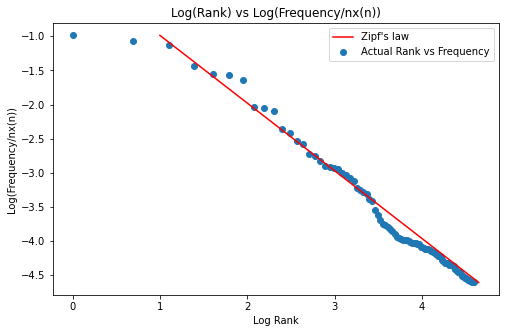

In [11]:
denominator = max(word_ranks)*min(top_word_series)

# Y variable is the log of word ranks and X is the word frequency divided by the denominator
# above
Y = np.array(np.log(word_ranks))
X = np.array(np.log(top_word_series/denominator))

# fit a linear regression to these, we dont need the intercept!
from sklearn import linear_model
reg_model = linear_model.LinearRegression(fit_intercept = False)
reg_model.fit(Y.reshape(-1,1), X)
print("The value of theta obtained is:",reg_model.coef_)

# make a plot of actual rank obtained vs theoretical rank expected
plt.figure(figsize = (8,5))
plt.scatter(Y, X, label = "Actual Rank vs Frequency")
plt.title('Log(Rank) vs Log(Frequency/nx(n))')
plt.xlabel('Log Rank')
plt.ylabel('Log(Frequency/nx(n))')

plt.plot(reg_model.predict(X.reshape(-1,1)), X, color = 'red', label = "Zipf's law")
plt.legend()

In [14]:
# import the necessary functions from the nltk library
from nltk.stem.wordnet import WordNetLemmatizer
lmtzr = WordNetLemmatizer()

# prepare corpus from the descriptions that dont have stopwords
corpus = " ".join(Data['Cleaned Job Description NoStop'].tolist())

#tokenize words
tokenized_corpus = nltk.word_tokenize(corpus)

# lemmatize these tokens
lemmatized_tokens = [lmtzr.lemmatize(token) for token in tokenized_corpus]

# word frequencies for the lemmatized tokens
fd = nltk.FreqDist(lemmatized_tokens)

# get the top words
top_words = []
for key, value in fd.items():
    top_words.append((key, value))

# sort the list by the top frequencies
top_words = sorted(top_words, key = lambda x:x[1], reverse = True)

# keep top 10 words only
top_words1 = top_words[:100]

top_words1

[('work', 4352),
 ('team', 2302),
 ('working', 2068),
 ('experience', 1994),
 ('customer', 1870),
 ('also', 1437),
 ('good', 1412),
 ('time', 1292),
 ('service', 1280),
 ('care', 1250),
 ('company', 1189),
 ('offer', 1174),
 ('day', 1174),
 ('employment', 1174),
 ('looking', 1134),
 ('colleague', 1105),
 ('year', 1068),
 ('position', 1048),
 ('within', 1047),
 ('opportunity', 1030),
 ('development', 1022),
 ('training', 998),
 ('hour', 981),
 ('project', 978),
 ('salary', 967),
 ('like', 958),
 ('job', 958),
 ('knowledge', 939),
 ('new', 897),
 ('u', 873),
 ('client', 836),
 ('contact', 836),
 ('together', 818),
 ('organization', 815),
 ('€', 788),
 ('want', 785),
 ('full', 779),
 ('home', 778),
 ('get', 741),
 ('employee', 732),
 ('business', 706),
 ('make', 705),
 ('part', 705),
 ('technical', 689),
 ('environment', 679),
 ('installation', 663),
 ('application', 654),
 ('level', 648),
 ('process', 647),
 ('term', 644),
 ('skill', 641),
 ('product', 636),
 ('education', 628),
 ('activ

In [13]:
top_words = top_words[:100]
top_words

[('work', 4352),
 ('team', 2302),
 ('working', 2068),
 ('experience', 1994),
 ('customer', 1870),
 ('also', 1437),
 ('good', 1412),
 ('time', 1292),
 ('service', 1280),
 ('care', 1250)]